# **데이터 EDA & 전처리**

## 데이터 불러오기 및 데이터 정리##

In [ ]:
#필요한 라이브러리 불러오기 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMRegressor
import lightgbm as lgb

warnings.filterwarnings('ignore')
%matplotlib inline

pd.options.display.float_format = '{:,.3f}'.format
sns.set()

In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import gc

In [ ]:
#train 데이터 불러오기 

pubg_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/보아즈_분석미니1차플젝/원본데이터/train_V2.csv의 사본")
train = pubg_data
train.info()

# 그냥 불러오면 983.9MB로 메모리가 굉장히 큰 상태 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [ ]:
#메모리 절약하기 위해서 미리 자료형 지정해줌 

dtypes = {
        'assists'           : 'uint8',
        'boosts'            : 'uint8',
        'damageDealt'       : 'float16',
        'DBNOs'             : 'uint8',
        'headshotKills'     : 'uint8', 
        'heals'             : 'uint8',    
        'killPlace'         : 'uint8',    
        'killPoints'        : 'uint16',    
        'kills'             : 'uint8',    
        'killStreaks'       : 'uint8',    
        'longestKill'       : 'float16',
        'matchDuration'     : 'uint8',
        'maxPlace'          : 'uint8',    
        'numGroups'         : 'uint8',    
        'rankPoints'        : 'uint8',
        'revives'           : 'uint8',    
        'rideDistance'      : 'float16',    
        'roadKills'         : 'uint8',    
        'swimDistance'      : 'float16',    
        'teamKills'         : 'uint8',    
        'vehicleDestroys'   : 'uint8',    
        'walkDistance'      : 'float16',    
        'weaponsAcquired'   : 'uint8',    
        'winPoints'         : 'uint8', 
        'winPlacePerc'      : 'float16' 
}

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/보아즈_분석미니1차플젝/원본데이터/train_V2.csv의 사본",dtype=dtypes) #위에서 지정한 타입으로 다시 불러오기 

In [ ]:
train.info() #메모리가 274.1MB로 절약된 것을 확인할 수 있음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          uint8  
 4   boosts           uint8  
 5   damageDealt      float16
 6   DBNOs            uint8  
 7   headshotKills    uint8  
 8   heals            uint8  
 9   killPlace        uint8  
 10  killPoints       uint16 
 11  kills            uint8  
 12  killStreaks      uint8  
 13  longestKill      float16
 14  matchDuration    uint8  
 15  matchType        object 
 16  maxPlace         uint8  
 17  numGroups        uint8  
 18  rankPoints       uint8  
 19  revives          uint8  
 20  rideDistance     float16
 21  roadKills        uint8  
 22  swimDistance     float16
 23  teamKills        uint8  
 24  vehicleDestroys  uint8  
 25  walkDistance     float16
 26  weaponsAcquired  uint8  
 27  winPoints   

In [ ]:
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [ ]:
train.isnull().sum()  #결측치는 'winPlacePerc'(승률 변수)에서 존재 ----->  전체 4446966 행에서 결측치 행 1행은 소수이기 때문에 이 행은 drop  

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [ ]:
train.dropna(inplace=True)

In [ ]:
# train.drop(['Id'], axis=1, inplace=True) # 'Id' 변수는 플레이어의 id(처음 게임 생성했을 때 지정하는 닉네임 변수)이기에 큰 영향을 주지 않을 것 같아서 drop 

In [ ]:
pd.set_option('display.max_columns', None) #데이터 프레임의 모든 열 출력하기기

## 변수 탐색

In [ ]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,1241,0,0,0.000,26,squad-fpp,28,26,255,0,0.000,0,0.000,0,0,244.750,1,186,0.444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.500,0,0,0,57,0,0,0,0.000,241,squad-fpp,26,25,204,0,0.005,0,11.039,0,0,"1,434.000",5,0,0.640
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,0,0,0,0.000,38,duo,50,47,211,0,0.000,0,0.000,0,0,161.750,2,0,0.775
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.906,0,0,0,75,0,0,0,0.000,156,squad-fpp,31,30,128,0,0.000,0,0.000,0,0,202.750,3,0,0.167
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.531,144,solo-fpp,97,95,24,0,0.000,0,0.000,0,0,49.750,2,0,0.188


**'groupId' 변수는 동일한 그룹인지 확인하는 변수, 듀오였다면 해당 id의 값이 동일한 행은 2개씩, 스쿼드였다면 3개씩 존재하는 상황임.**

In [ ]:
train[train['groupId']=='684d5656442f9e']

#4행이 떴기 때문에 스쿼드 ---> 여기서 의문, 같은 팀이면 승률도 동일할까?

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.500,0,0,0,57,0,0,0,0.000,241,squad-fpp,26,25,204,0,0.005,0,11.039,0,0,"1,434.000",5,0,0.640
953779,3dcf4259b62f66,684d5656442f9e,aeb375fc57110c,2,1,300.750,0,0,6,18,0,2,1,78.000,241,squad-fpp,26,25,196,0,"5,416.000",0,0.000,0,0,"1,847.000",5,0,0.640
1366988,5406618d55edc0,684d5656442f9e,aeb375fc57110c,0,2,0.000,0,0,2,56,0,0,0,0.000,241,squad-fpp,26,25,200,0,"3,676.000",0,0.000,0,0,"1,855.000",8,0,0.640
1613949,fb37a556eb6a3d,684d5656442f9e,aeb375fc57110c,0,3,179.000,2,0,5,17,0,2,2,5.680,241,squad-fpp,26,25,211,0,"3,694.000",0,0.000,0,0,"2,436.000",6,0,0.640


In [ ]:
train[train['groupId']=='6a4a42c3245a74']

#2행이 떴기 떄문에 듀오---> 승률이 또 같게 나온 것을 보면 같은 팀이면 승률이 동일한 것 같음 

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,0,0,0,0.000,38,duo,50,47,211,0,0.000,0,0.000,0,0,161.750,2,0,0.775
3649524,3d588ea15ea8ba,6a4a42c3245a74,110163d8bb94ae,0,3,146.625,1,0,2,18,0,2,1,10.844,38,duo,50,47,214,0,340.500,0,0.000,0,0,"1,119.000",2,0,0.775


In [ ]:
train['matchType'].value_counts() #매치 타입(솔로, 듀오, 스쿼드 등등) 종류에 따라서 승률이 바뀔 수 있으니 매치 타입을 나누어서 생각 

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536761
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

* fpp는 1인칭, 배그에서의 디폴트 값은 3인칭인데 1인칭과 3인칭은 구분하는 것이 별 차이가 없을 것 같아서 묶어줌 ex) solo, duo, squad
* crash는 튕김 현상, flare는 배그 측에서 개최한 이벤트, 승률에는 무관해 보여서 묶어주기 

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
train['matchType'] = train['matchType'].apply(lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) else 'etc' if ('flare' in x) or ('crash' in x) else 'squad')
encoder = LabelEncoder()
train['matchType'] = encoder.fit_transform(train['matchType'])
train['matchType'].value_counts()


3    2400402
0    1315970
2     720712
1       9881
Name: matchType, dtype: int64

In [ ]:
print(encoder.inverse_transform([0,1,2,3])) # duo는 0으로 etc는 1로 solo는 2로 squad는 3으로 레이블인코딩 됨 

['duo' 'etc' 'solo' 'squad']


In [ ]:
# 매치타입 별도의 데이터를 생성 
df_0 = train[(train.matchType == 0)]
df_1 = train[(train.matchType == 1)]
df_2 = train[(train.matchType == 2)]
df_3 = train[(train.matchType == 3)]

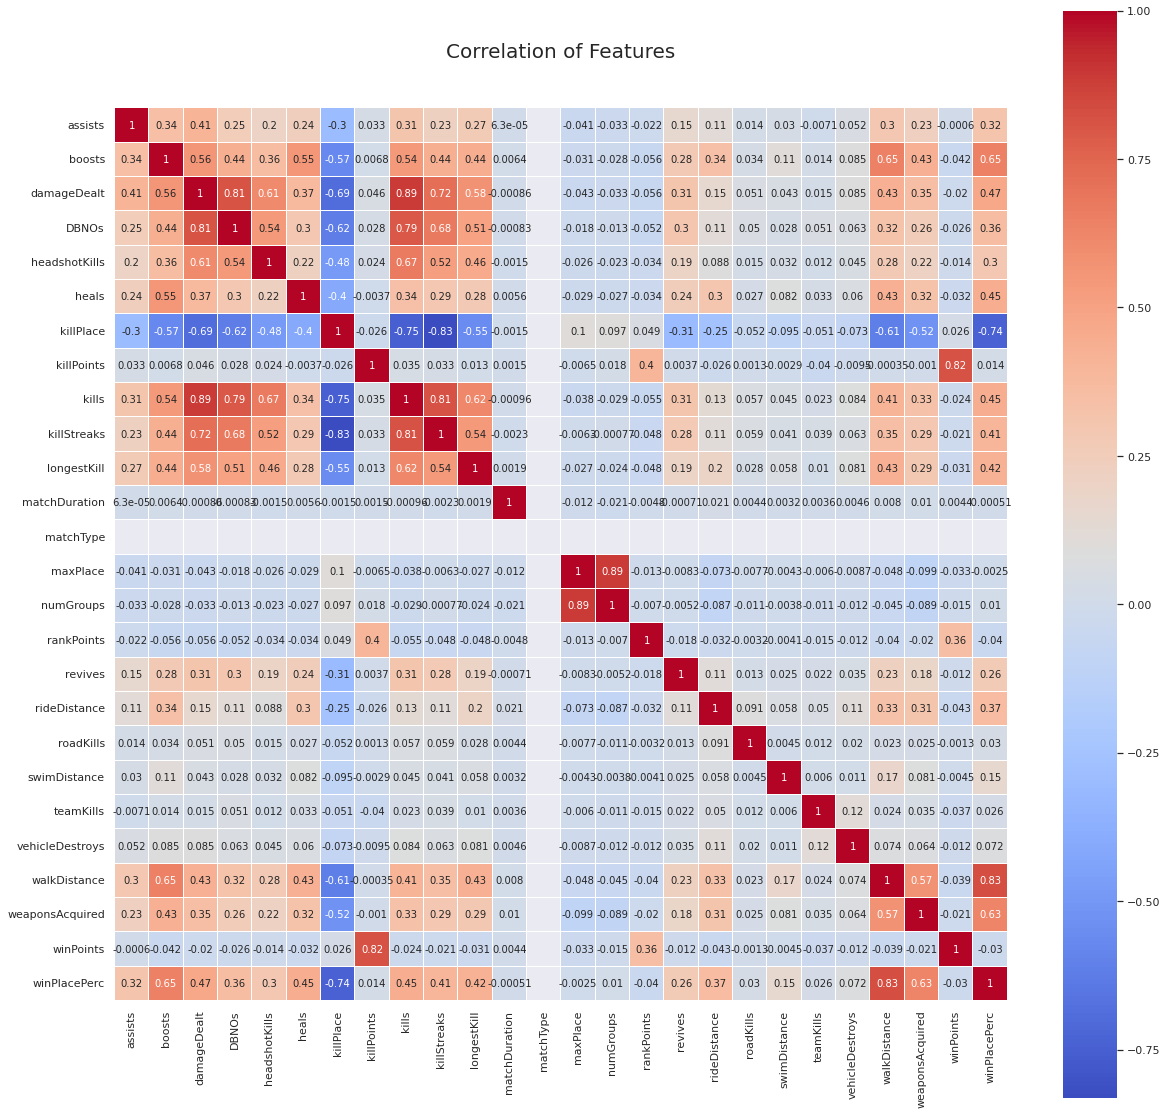

In [ ]:
# '듀오' 매치타입의 변수들끼리의 상관관계를 보여주는 히트맵 그리기 
plt.figure(figsize=(20, 20))
plt.title("Correlation of Features", y = 1.05, size = 20)
sns.heatmap(df_0.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = 'coolwarm', linecolor = "white", annot = True, annot_kws = {"size" : 10})

* 총 넣은 데미지 수와 킬 수가 높은 양의 상관관계  
* 총 넣은 데미지 수와 DBNO 높은 양의 상관관계 
* killpoint와 winpoint는 양의 상관관계---> 킬 수가 많을 수록 이길 확률이 높음 

In [ ]:
df_0.corr() #표로 상관관계 확인 

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000,0.344,0.412,0.254,0.204,0.235,-0.299,0.033,0.312,0.226,0.269,0.000,NaN,-0.041,-0.033,-0.022,0.149,0.114,0.014,0.030,-0.007,0.052,0.298,0.234,-0.001,0.320
boosts,0.344,1.000,0.561,0.439,0.363,0.553,-0.572,0.007,0.542,0.437,0.444,0.006,NaN,-0.031,-0.028,-0.056,0.279,0.337,0.034,0.111,0.014,0.085,0.649,0.434,-0.042,0.648
damageDealt,0.412,0.561,1.000,0.814,0.610,0.372,-0.694,0.046,0.892,0.718,0.577,-0.001,NaN,-0.043,-0.033,-0.056,0.306,0.152,0.051,0.043,0.015,0.085,0.432,0.352,-0.020,0.472
DBNOs,0.254,0.439,0.814,1.000,0.536,0.296,-0.622,0.028,0.794,0.676,0.506,-0.001,NaN,-0.018,-0.013,-0.052,0.302,0.115,0.050,0.028,0.051,0.063,0.323,0.263,-0.026,0.357
headshotKills,0.204,0.363,0.610,0.536,1.000,0.223,-0.481,0.024,0.667,0.521,0.459,-0.002,NaN,-0.026,-0.023,-0.034,0.195,0.088,0.015,0.032,0.012,0.045,0.281,0.217,-0.014,0.298
heals,0.235,0.553,0.372,0.296,0.223,1.000,-0.405,-0.004,0.339,0.293,0.282,0.006,NaN,-0.029,-0.027,-0.034,0.244,0.300,0.027,0.082,0.033,0.060,0.431,0.325,-0.032,0.447
killPlace,-0.299,-0.572,-0.694,-0.622,-0.481,-0.405,1.000,-0.026,-0.747,-0.831,-0.552,-0.002,NaN,0.105,0.097,0.049,-0.305,-0.252,-0.052,-0.095,-0.051,-0.073,-0.614,-0.520,0.026,-0.744
killPoints,0.033,0.007,0.046,0.028,0.024,-0.004,-0.026,1.000,0.035,0.033,0.013,0.001,NaN,-0.007,0.018,0.401,0.004,-0.026,0.001,-0.003,-0.040,-0.009,-0.000,-0.001,0.815,0.014
kills,0.312,0.542,0.892,0.794,0.667,0.339,-0.747,0.035,1.000,0.815,0.620,-0.001,NaN,-0.038,-0.029,-0.055,0.313,0.129,0.057,0.045,0.023,0.084,0.413,0.333,-0.024,0.447
killStreaks,0.226,0.437,0.718,0.676,0.521,0.293,-0.831,0.033,0.815,1.000,0.535,-0.002,NaN,-0.006,-0.001,-0.048,0.276,0.109,0.059,0.041,0.039,0.063,0.354,0.294,-0.021,0.406


듀오, 솔로, 스쿼드, 나머지(사실 이벤트 성이라 제거해도 될 듯) 매치 타입별로 변수들끼리의 상관관계를 분석하고 높은 양의 값을 보여주는 변수들끼리 조합해서 추후 승률 향상 레포트 부분에 참고해도 좋을 듯.

In [ ]:
train.corr() #매치 타입 나누지 않고 상관관계 확인하기 

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000,0.308,0.407,0.301,0.198,0.229,-0.290,0.039,0.320,0.243,0.261,-0.009,0.055,-0.148,-0.147,-0.005,0.198,0.111,0.012,0.023,0.006,0.058,0.290,0.244,0.002,0.299
boosts,0.308,1.000,0.522,0.359,0.335,0.536,-0.555,0.008,0.502,0.405,0.423,0.007,0.008,-0.014,-0.013,-0.040,0.253,0.329,0.035,0.108,0.013,0.087,0.640,0.407,-0.041,0.634
damageDealt,0.407,0.522,1.000,0.736,0.613,0.343,-0.677,0.050,0.889,0.704,0.564,-0.003,0.006,-0.041,-0.040,-0.029,0.257,0.141,0.052,0.037,0.015,0.081,0.398,0.353,-0.016,0.441
DBNOs,0.301,0.359,0.736,1.000,0.470,0.265,-0.555,0.043,0.708,0.647,0.451,-0.018,0.090,-0.268,-0.266,-0.021,0.301,0.103,0.036,0.017,0.069,0.060,0.285,0.218,-0.016,0.280
headshotKills,0.198,0.335,0.613,0.470,1.000,0.200,-0.470,0.024,0.674,0.513,0.447,-0.000,0.000,0.009,0.009,-0.022,0.150,0.076,0.013,0.029,0.009,0.039,0.251,0.218,-0.013,0.278
heals,0.229,0.536,0.343,0.265,0.200,1.000,-0.386,-0.003,0.312,0.270,0.263,0.006,0.025,-0.065,-0.064,-0.022,0.237,0.297,0.025,0.080,0.035,0.063,0.430,0.309,-0.030,0.428
killPlace,-0.290,-0.555,-0.677,-0.555,-0.470,-0.386,1.000,-0.023,-0.730,-0.811,-0.541,0.001,0.004,0.017,0.019,0.031,-0.270,-0.236,-0.057,-0.089,-0.038,-0.074,-0.590,-0.490,0.032,-0.719
killPoints,0.039,0.008,0.050,0.043,0.024,-0.003,-0.023,1.000,0.036,0.037,0.014,-0.008,0.045,-0.045,-0.042,0.456,0.012,-0.029,-0.004,-0.005,-0.040,-0.010,0.005,-0.004,0.809,0.013
kills,0.320,0.502,0.889,0.708,0.674,0.312,-0.730,0.036,1.000,0.803,0.603,-0.000,-0.001,-0.005,-0.004,-0.033,0.253,0.115,0.064,0.039,0.018,0.080,0.375,0.336,-0.022,0.420
killStreaks,0.243,0.405,0.704,0.647,0.513,0.270,-0.811,0.037,0.803,1.000,0.515,-0.004,-0.005,-0.037,-0.036,-0.027,0.242,0.098,0.066,0.035,0.028,0.064,0.328,0.275,-0.019,0.378


In [ ]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,1241,0,0,0.000,26,3,28,26,255,0,0.000,0,0.000,0,0,244.750,1,186,0.444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.500,0,0,0,57,0,0,0,0.000,241,3,26,25,204,0,0.005,0,11.039,0,0,"1,434.000",5,0,0.640
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,0,0,0,0.000,38,0,50,47,211,0,0.000,0,0.000,0,0,161.750,2,0,0.775
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.906,0,0,0,75,0,0,0,0.000,156,3,31,30,128,0,0.000,0,0.000,0,0,202.750,3,0,0.167
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.531,144,2,97,95,24,0,0.000,0,0.000,0,0,49.750,2,0,0.188


In [ ]:
len(train[train['matchId']=='a10357fd1a4a91'])  

# matchId는 매치된 한 게임 기준 부여 ----> 한 게임에 96명이 들어감 

96

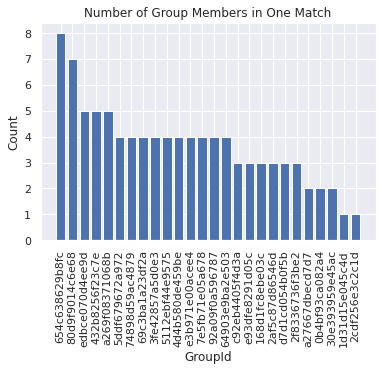

Min number of group members is:  1
Max number of group members is:  8


In [ ]:
group_tmp = train[train['matchId']=='a10357fd1a4a91']['groupId'].value_counts().sort_values(ascending=False)
plt.figure()
plt.bar(group_tmp.index,group_tmp.values)
plt.xlabel('GroupId')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Number of Group Members in One Match')
plt.show()

print('Min number of group members is: ',min(group_tmp.values))
print('Max number of group members is: ',max(group_tmp.values))



한 예시로 matchId가 a10357fd1a4a91라는 한판 내에서 groupId가 같은 명수를 세봤는데 4이상인 수가 나왔음. 배그는 4인큐(스쿼드)가 한 팀에서 최대 인원인데 그 이상인 수가 나옴

michaelapers님 왈 "게임에서 연결이 끊기기 때문에 발생하는 현상입니다. 연결 해제가 발생하면 여러 그룹의 플레이어가 API의 데이터베이스에 동일한 최종 배치를 가진 것으로 저장되기 때문입니다. "

----> **결국에는 groupId는 함께한 팀이 아니라 동일한 최종 순위를 가진 선수라고 생각해야 함.** 

## 이상치 제거

In [ ]:
# 걸은 거리가 0인데 킬이 있는 경우 ----> 배그는 지역에 내리자마자 총을 줍거나 맨 주먹으로 때려야 킬 수가 생기는데 줍거나 주먹을 때릴 때 조금이라도 걷기 때문에 걸은 거리가 0인데 킬 수가 생길 수가 없음 
train.loc[(train.walkDistance==0) & (train.kills>=1), ]  #1549행 

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.000,0,0,3,18,0,6,3,23.547,81,3,15,13,220,0,0.000,0,0.000,0,0,0.000,8,0,0.857
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.500,0,0,6,33,0,3,1,6.523,2,3,11,11,220,0,0.000,0,0.000,0,0,0.000,22,0,0.600
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,"1,750.000",0,4,5,3,0,20,6,37.094,130,2,20,15,220,0,0.000,0,0.000,0,0,0.000,13,0,0.895
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.750,0,0,0,69,1000,1,1,21.547,31,3,19,18,255,0,0.000,0,0.000,0,0,0.000,7,220,0.000
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.000,0,1,0,37,0,1,1,55.438,2,3,11,11,220,0,0.000,0,0.000,0,0,0.000,10,0,0.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440232,1f3a6d69d22c7e,60b2849191c539,ff9cd80c0d8fb7,0,0,4.316,0,0,0,61,1000,1,1,41.250,31,3,10,10,255,0,0.000,0,0.000,0,0,0.000,7,220,0.889
4440898,a089cb33a75968,eda174acfb503b,4c6b1a0e4cb346,0,0,90.812,0,0,4,42,0,1,1,48.219,2,3,2,2,220,0,0.000,0,0.000,0,0,0.000,8,0,0.000
4440927,0634c650048997,5ccccee03a7f17,fc0bbecba8db99,2,2,909.000,7,2,16,26,1000,6,2,154.750,4,3,11,11,255,0,0.000,0,0.000,0,0,0.000,7,220,0.600
4441511,f5d385cadfab7e,a068f79011113c,fc0bbecba8db99,6,2,696.500,9,2,0,18,1000,9,2,89.500,4,3,11,11,255,10,0.000,0,0.000,1,0,0.000,16,220,0.900


In [ ]:
# walkDistance==0 & kills>=1인 값을 가진 행들 제거 
train = train.drop(train[train.walkDistance==0][train.kills>=1].index)

In [ ]:
# 데미지 양이 없는데 킬 수가 있는 경우----> 킬을 해야 해당 킬에 따라서 데미지가 생기기 때문에 딜이 없다면 킬 수가 생길 수가 없음 
train.loc[(train.damageDealt==0) & (train.kills>=1), ]  #4151행 

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
892,1483b507bf43be,e468ae00a05134,19b3a8232074e5,1,0,0.000,0,0,1,37,1523,1,1,10.602,67,3,28,28,255,0,0.000,0,0.000,0,0,231.125,2,163,0.296
942,0da074947acace,780051d11688f1,56b36999cfe3ee,0,0,0.000,0,0,0,39,1058,1,1,8.492,111,3,27,25,255,0,0.000,0,0.000,0,0,62.344,2,194,0.192
2448,c63b184658a1a3,3dc6e06ab727eb,e26d9b4f6dfdf1,0,0,0.000,0,0,0,26,0,1,1,16.109,102,3,30,29,216,0,0.000,0,0.000,1,0,"1,514.000",3,0,0.552
2850,751d4916e02c7c,f1d428a4b98ba1,5ae3a69bef506e,0,0,0.000,0,1,0,28,0,1,1,0.000,36,3,27,27,193,1,"2,214.000",0,0.000,0,0,915.000,5,0,0.577
3011,b155164fd1f063,e29566c9a0d7b4,abad739a729c29,0,3,0.000,0,0,2,37,1239,1,1,43.125,106,3,29,29,0,0,0.000,0,0.000,0,0,"2,088.000",8,212,0.464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444208,09f0e19baacdb9,66b5af9fbd9540,1f7460f60f8645,0,0,0.000,0,0,0,37,1093,1,1,34.906,164,3,28,28,255,0,0.000,0,0.000,0,0,31.672,2,0,0.296
4444586,2b0f82148db808,aa9a1d8659d27d,a830228514f1a5,0,0,0.000,0,0,0,42,0,1,1,61.000,91,0,49,49,228,0,0.000,0,0.000,0,0,123.375,2,0,0.354
4444646,532b9428583e93,afcf2b32044608,dfd7327dc91394,0,0,0.000,0,0,0,29,0,1,1,24.625,80,3,27,25,138,1,0.000,0,0.000,0,0,335.250,3,0,0.269
4445499,44fb23554a8930,4549cedf3cce66,6366ed38dbb461,0,0,0.000,0,0,0,29,1070,1,1,8.688,221,3,28,28,255,0,0.000,0,0.000,0,0,13.797,1,204,0.000


In [ ]:
# danageDealt==0 & kills1>=1인 값을 가진 행들 제거 
train=train.drop(index=train[ (train['damageDealt']==0) & (train['kills']>=1)  ].index)

In [ ]:
# 자동차를 탄 거리량이 0인데 자동차킬이 1 이상인 경우----> 로드킬은 자동차를 타고 이동할 때만 생기는 건데 차량 거리량이 0인데 로드킬이 1이상은 이상치 
train.loc[(train.rideDistance==0) & (train.roadKills>=1), ]  #186행행

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
820,209314d1a20b48,72a26f1ded95d6,7abce2d2ca9e49,1,1,334.750,4,0,1,17,1187,2,1,50.969,178,3,28,28,255,0,0.000,1,0.000,0,0,838.000,6,253,0.370
40362,81863d8837256d,af6e04e1b77f4b,59ad07f21f77dd,0,1,272.500,1,1,2,22,0,2,1,115.625,56,3,29,29,220,0,0.000,1,127.688,0,0,"2,444.000",4,0,0.536
46376,ed7575c25f2a5e,9be59a8d7ae94b,6c5c240ed3e339,2,5,299.000,3,0,6,12,1378,2,1,15.094,78,0,50,49,255,1,0.000,1,0.000,0,0,"3,054.000",4,229,0.898
50918,b5f8da95af493f,1a2f5a68a2720c,ae50bb56b6da4e,0,0,169.250,1,0,0,39,0,1,1,14.422,79,0,46,44,173,0,0.000,1,0.000,0,0,148.625,1,0,0.133
55266,77178fffc09d09,86fd3da1738c43,620f0ea9a8c997,0,0,100.000,2,0,0,31,0,1,1,64.062,71,3,28,24,206,1,0.000,1,0.000,1,0,696.000,3,0,0.370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417743,e32a8f224bee8a,a2f7c3e4f4ff2e,15fbf879405faf,0,3,329.000,1,1,2,4,1050,4,2,127.000,83,0,47,45,255,0,0.000,1,104.625,0,0,"2,504.000",4,219,0.870
4418648,8dc09552147fe2,0284db08778c3b,f9a88397f45677,0,0,96.438,1,0,0,31,1211,1,1,7.680,56,3,27,27,255,0,0.000,1,0.000,0,0,"1,293.000",3,149,0.346
4426830,c9df7b60fd1b00,b7460fb7ea1462,e31f8af291bb6e,0,0,100.000,1,0,0,36,0,1,1,0.800,97,3,26,25,232,0,0.000,1,0.000,0,0,29.406,1,0,0.040
4444830,027b3f672516a1,766b70fa9c7750,4248befe3f7d28,0,6,443.000,4,0,6,4,1175,5,2,59.219,91,0,50,49,255,0,0.000,1,0.000,0,0,"2,876.000",5,223,0.837


In [ ]:
# rideDistance==0 & roadKills>=1 인 값을 가진 행들 제거 
train=train.drop(index=train[ (train['rideDistance']==0) & (train['roadKills']>=1)  ].index)

In [ ]:
# 한 매치에서 최대 킬 수가 해당 매치의 참여 인원 수 보다 많은 경우 -----> ex) 매치의 참여 인원 수가 95명인데 나의 최대 킬 수가 96일 수가 없음

# 같은 게임에 참여한 사람 수 컬럼 수 만듦
train['num']=train.groupby('matchId')['Id'].transform('count')
# 한 게임에서 최대 킬수 컬럼
train['max']=train.groupby('matchId')['kills'].transform('max')

train.loc[train['max']>train['num'], ['num', 'max']] #2064 행 

,num,max
1292,28,38
2769,10,23
5479,8,17
12210,22,30
13781,10,17
...,...,...
4431589,6,28
4432354,13,14
4434989,15,23
4435441,13,16


In [ ]:
# 최대 킬수가 한 게임 사람 수 보다 많을 수 없음, 행 제거
train=train.drop(index=train[(train['max']>train['num'])].index)

In [ ]:
train.drop(['num', 'max'], axis=1, inplace=True)  # 이상치 제거를 위해 생성한 num, max 컬럼 제거거

In [ ]:
# 승률이 1 즉, 1등을 했는데 이동한 거리량이 0인 경우는 확률상 말이 안 됨
train.loc[(train.winPlacePerc==1) & (train.walkDistance==0), ]  #801행행

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
3702,3fc123559fc935,5cef1df7ee3551,01aead02bb8901,0,0,0.000,0,0,0,1,0,0,0,0.000,16,2,20,2,220,0,0.000,0,0.000,0,0,0.000,3,0,1.000
8790,106afdb574db25,4b0ae4659e9936,cf0cb51c829eb5,0,0,0.000,0,0,0,2,0,0,0,0.000,16,2,18,2,220,0,0.000,0,0.000,0,0,0.000,1,0,1.000
9264,0351565a7058e9,3663a93a319725,3659fe3694262a,0,0,0.322,0,0,0,1,0,0,0,0.000,16,2,18,2,220,0,0.000,0,0.000,0,0,0.000,9,0,1.000
18426,e6d6f94558dd2f,22818b9a9a6159,486200c5613f14,0,1,0.000,0,0,0,2,0,0,0,0.000,16,2,19,2,220,0,0.000,0,0.000,0,0,0.000,6,0,1.000
19054,d0683f5d780f09,faebf5c484de4a,ec9a90395ed8c0,0,0,99.000,0,0,0,1,0,0,0,0.000,16,2,17,2,220,0,0.000,0,0.000,0,0,0.000,9,0,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4428507,6ac77da13b411e,4e57c67765fb61,1b066b1bd0036f,0,0,0.000,0,0,0,3,0,0,0,0.000,16,2,18,2,220,0,0.000,0,0.000,0,0,0.000,18,0,1.000
4430451,69f2d577afb916,1ca82eb3229fe3,8b1af8b54b0edb,0,0,0.000,0,0,0,2,0,0,0,0.000,16,2,18,2,220,0,0.000,0,0.000,0,0,0.000,0,0,1.000
4432272,87a4d46be07ec6,7921c8beb38c2d,2183f03b8dd456,0,3,115.625,0,0,1,2,0,0,0,0.000,16,2,20,2,220,0,0.000,0,0.000,0,0,0.000,6,0,1.000
4443248,120b7d2d32663f,b70109a45eb127,6db87452a2db21,0,0,0.000,0,0,0,2,0,0,0,0.000,16,2,17,2,220,0,0.000,0,0.000,0,0,0.000,3,0,1.000


In [ ]:
# 승률이 1인데 이동한 거리량이 0인 행들 제거 
train = train.drop(train[train.winPlacePerc==1][train.walkDistance==0].index)

In [ ]:
# 매치 타입이 솔로(=2)인데 assists, revives, teamKills, DBNOs이 1이상인 데이터프레임---> 솔로인데 팀 관련 값이 1 이상일 수가 없음음

train.loc[(train.matchType==2) & ((train.assists>=1) | (train.revives>=1) | (train.teamKills>=1) | (train.DBNOs>=1)),] #47183행 

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
101,707550186fd7f7,82f350bdba9e4e,7932e2acfa4c4c,1,6,604.500,0,2,7,4,0,5,1,99.250,185,2,93,92,7,0,0.000,0,0.000,0,0,"1,766.000",2,0,0.989
211,e3bcf6441ccd67,d46dbf0c3a9606,6ed3a0442451ba,1,0,98.375,0,0,0,62,0,0,0,0.000,42,2,97,97,220,0,0.000,0,0.000,0,0,656.000,3,0,0.562
324,bd501a83f7fbd4,df36922667f5e6,649a068541fbb3,1,0,105.312,0,0,1,66,1091,0,0,0.000,24,2,98,97,255,0,0.000,0,0.000,0,0,84.125,3,188,0.423
388,029a693a75ef57,11d78ae0ca90b6,bfccecf5202cc8,1,1,568.500,0,1,0,3,1339,5,1,92.812,172,2,98,92,255,0,"5,188.000",1,0.000,0,0,826.500,4,1,0.598
450,11093bb28cae92,af9cce931557fb,7ac9ddccc44767,1,0,82.812,0,0,0,93,0,0,0,0.000,6,2,97,92,198,0,0.000,0,0.000,0,0,8.352,0,0,0.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446623,938a590b4f69de,eb5f0871195d2b,fea972d0fbd52d,1,1,191.125,0,1,2,25,1038,1,1,9.055,163,2,96,94,255,0,0.000,0,0.000,0,0,"1,844.000",3,234,0.874
4446693,1e7fde2e824079,dc3e583d14c681,237585cba79025,1,0,23.219,0,0,0,87,0,0,0,0.000,134,2,92,92,106,0,0.000,0,0.000,0,0,19.516,1,0,0.066
4446738,f3d427f00684e0,170bf9cad0caa7,b4bb2afe802954,1,2,313.250,0,1,0,18,1630,2,1,38.875,78,2,97,97,255,0,966.000,0,0.000,0,0,514.500,3,226,0.667
4446790,5af72128847c8b,5692a94aec2f11,cbc3665d093dbc,0,2,128.500,0,0,3,27,0,1,1,8.586,32,2,98,97,230,0,"8,480.000",0,0.000,1,2,"1,468.000",4,0,0.752


In [ ]:
# 솔로일 때 팀 관련 변수들의 값이 1이상인 행들 제거

train = train.drop(train[train.matchType==2][train.assists>=1].index)
train = train.drop(train[train.matchType==2][train.revives>=1].index)
train = train.drop(train[train.matchType==2][train.teamKills>=1].index)
train = train.drop(train[train.matchType==2][train.DBNOs>=1].index)

In [ ]:
#획득 무기 수가 0개인데 승률이 1위인 행들 제거 
train = train.drop(train[train.weaponsAcquired==0][train.winPlacePerc==1].index) #배그 특성상 무기가 없으면 1등할 수가 없음 

In [ ]:
# 킬과 킬 사이의 이동한 가장 긴 거리수가 0인데 킬 수가 1이상인 행들 제거 
train = train.drop(train[train.longestKill==0][train.kills>=1].index) 

In [ ]:
# 힐링 아이템과 부스트 아이템을 사용했는데 걷는 거리량이 0인 행들 제거 -----> 아이템을 쓰기 위해서는 움직일 수밖에 없음 
index_drop = train[((train['heals']>0) | (train['boosts']>0)) & (train['walkDistance']==0)].index
print(index_drop.shape)
train.drop(index_drop, axis=0, inplace = True)

(311,)


In [ ]:
# 획득 무기가 최소 1개라도 있는데 거리량이 0인 행들 제거----> 무기를 얻기 위해서는 걸을 수밖에 없음음
train = train.drop(train[train.weaponsAcquired>0][train.walkDistance==0].index) 

In [ ]:
# 어시스트가 최소 1개라도 있는데 거리량이 0인 행들 제거---> 팀에서 움직이지 않으면 어시스트를 할 수 없음 
train = train.drop(train[train.assists>0][train.walkDistance==0].index) 

In [ ]:
# 총 넣은 데미지가 존재하는데 거리량이 0인 행들 제거---> 걷지 않으면 데미지를 넣을 수 없음 
train = train.drop(train[train.damageDealt>0][train.walkDistance==0].index) 

1) 
매치타입(솔로,듀오,스쿼드,나머지)로 데이터 타입을 나누어서 모델을 돌려보는 방향도 생각해 보기  
2) 위에서 진행한 것들 말고 또 다른 이상치들도 있는지 생각해 보기

## 매개변수/파생변수 추가

https://github.com/anisepy/ML_PUBG_BHCteam

위에 링크에서 승률을 기준으로 하위, 중위, 상위로 세분화하였고 
이에 따라서 각 변수들의 값이 어떤지를 확인하고 기준을 두어서 새로운 변수를 생성했는데
이 부분 코드를 어떻게 하는지 잘 모르겠습니다,,,! 

In [ ]:
train5=train.copy() #기존 train 데이터를 복사한 'train5' 데이터프레임 생성성

In [ ]:
def feature_engineering(train5):
    train5.insert(train5.shape[1]-1, 'killsPerMeter', train5['kills']/train5['walkDistance'])
    train5['killsPerMeter'].fillna(0, inplace=True)
    train5['killsPerMeter'].replace(np.inf, 0, inplace=True)

    train5.insert(train5.shape[1]-1, 'healsPerMeter', train5['heals']/train5['walkDistance'])
    train5['healsPerMeter'].fillna(0, inplace=True)
    train5['healsPerMeter'].replace(np.inf, 0, inplace=True)

    train5.insert(train5.shape[1]-1, 'totalHeals', train5['heals']+train5['boosts'])

    train5.insert(train5.shape[1]-1, 'totalHealsPerMeter', train5['totalHeals']/train5['walkDistance'])
    train5['totalHealsPerMeter'].fillna(0, inplace=True)
    train5['totalHealsPerMeter'].replace(np.inf, 0, inplace=True)

    train5.insert(train5.shape[1]-1, 'totalDistance', train5['walkDistance']+train5['rideDistance']+train5['swimDistance'])
    train5['totalDistance'].fillna(0, inplace=True)
    train5['totalDistance'].replace(np.inf, 0, inplace=True)

    train5.insert(train5.shape[1]-1, 'headshotRate', train5['headshotKills']/train5['kills'])
    train5['headshotRate'].fillna(0, inplace=True)
    train5['headshotRate'].replace(np.inf, 0, inplace=True)

    train5.insert(train5.shape[1]-1, 'assistsAndRevives', train5['assists']+train5['revives'])

    train5.insert(train5.shape[1]-1, 'itemsAcquired', train5['heals']+train5['boosts']+train5['weaponsAcquired'])
    
    return train5

In [ ]:
train5 = feature_engineering(train5)

In [ ]:
train=train5.copy()

In [ ]:
train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,killsPerMeter,healsPerMeter,totalHeals,totalHealsPerMeter,totalDistance,headshotRate,assistsAndRevives,itemsAcquired,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,1241,0,0,0.000,26,3,28,26,255,0,0.000,0,0.000,0,0,244.750,1,186,0.000,0.000,0,0.000,244.750,0.000,0,1,0.444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.500,0,0,0,57,0,0,0,0.000,241,3,26,25,204,0,0.005,0,11.039,0,0,"1,434.000",5,0,0.000,0.000,0,0.000,"1,445.000",0.000,0,5,0.640
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,0,0,0,0.000,38,0,50,47,211,0,0.000,0,0.000,0,0,161.750,2,0,0.000,0.000,0,0.000,161.750,0.000,1,2,0.775
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.906,0,0,0,75,0,0,0,0.000,156,3,31,30,128,0,0.000,0,0.000,0,0,202.750,3,0,0.000,0.000,0,0.000,202.750,0.000,0,3,0.167
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.531,144,2,97,95,24,0,0.000,0,0.000,0,0,49.750,2,0,0.020,0.000,0,0.000,49.750,0.000,0,2,0.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.000,0,0,0,74,1029,0,0,0.000,81,3,29,28,255,0,"1,292.000",0,0.000,0,0,"1,019.000",3,227,0.000,0.000,0,0.000,"2,312.000",0.000,0,3,0.179
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.156,0,0,0,69,0,0,0,0.000,155,2,93,93,221,0,0.000,0,0.000,0,0,81.688,6,0,0.000,0.000,1,0.012,81.688,0.000,0,7,0.293
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.062,0,0,0,66,0,0,0,0.000,41,3,28,28,220,0,0.000,0,2.184,0,0,788.500,4,0,0.000,0.000,0,0.000,790.500,0.000,0,4,0.481
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.375,1,1,2,11,0,2,1,98.500,93,3,26,25,138,2,0.000,0,0.000,0,0,"2,748.000",8,0,0.001,0.001,6,0.002,"2,748.000",0.500,2,14,0.800
